# **Project Name**    - Amazon Prime Video Titles Analysis & IMDb Rating Prediction



##### **Project Type**    - EDA and Regression
##### **Contribution**    - Individual
##### **Author**          - Anish Shrikrishna Wadatkar

# **Project Summary -**

This project focuses on developing a machine learning solution using a structured data science pipeline. The primary objective is to understand the dataset, preprocess it appropriately, build predictive models, and evaluate their performance. The workflow followed in this project includes data cleaning, handling missing values, feature encoding, feature scaling, model training, testing, and interpretation of results.

The dataset was first explored to understand the number of instances, features, and the overall structure. Missing values were identified and handled appropriately using suitable techniques such as imputation or row removal depending on the significance of the data. Categorical variables, if present, were encoded so that they could be used effectively by machine learning algorithms. Numerical features were scaled where required to ensure that algorithms sensitive to feature magnitude performed correctly.

After preprocessing, the dataset was split into training and testing sets to fairly evaluate model performance on unseen data. Different machine learning algorithms were considered and one or more were selected based on suitability for the problem type (classification or regression). Hyperparameters were tuned where necessary to improve performance.

Evaluation metrics such as accuracy, precision, recall, F1-score, or mean squared error were used depending on the nature of the prediction task. These metrics helped assess how well the model generalized and whether issues like overfitting or underfitting were present. Visualizations and performance summaries were included to support interpretation of results.

Dimensionality reduction was considered but not applied because the number of features in the dataset was already small and manageable. All features were retained since they contributed meaningful information to the predictive model.

Overall, the project demonstrates the complete end-to-end machine learning pipeline from data understanding to model evaluation. The final model provides useful predictive capability and illustrates the practical application of machine learning techniques to real-world structured datasets.

# **GitHub Link -**

https://github.com/Anish8800/Amazon_Prime_Project

# **Problem Statement**


The goal of this project is to build a machine learning model that can learn patterns from the given dataset and make accurate predictions on unseen data. The project involves data preprocessing, exploratory data analysis, feature engineering, model building, evaluation, and interpretation of results. The objective is to identify the most suitable machine learning algorithm for this dataset and evaluate its performance using appropriate metrics.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


### Dataset Loading

In [2]:
# Load Dataset
import os
import pandas as pd
print(os.listdir())

titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

titles.head(), credits.head()


['.ipynb_checkpoints', '1st anniveesary-20241226T163911Z-001.zip', '1st anniveesary-20241226T163911Z-002.zip', '1st anniveesary-20241226T163911Z-003.zip', '560.94-desktop-win10-win11-64bit-international-dch-whql.exe', 'Adobe Scan 05 Nov 2025.docx', 'Amazon Prime TV Shows and Movies.pptx', 'Amazon_Prime_EDA.ipynb', 'Amazon_Prime_ML.ipynb', 'Amazon_Prime_Project', 'anishwadatkar-deepmindhackathon-ipynb.ipynb', 'Anish_Wadatkar_Resume.pdf', 'apowermirrorpro-setup-saas-pro.exe', 'ArrayListOps1.java', 'ArrayListOps2.java', 'Assignment 4.docx', 'Assignment 5.docx', 'Assignment 8.docx', 'Assignment 9 (1).docx', 'Assignment 9 (1).pdf', 'Assignment 9.docx', 'Assignment 9.pdf', 'Assignment-CA-Writing.pdf', 'attachments.zip', 'Background-2.jpg', 'basic-miktex-24.1-x64.exe', 'best_model.pkl', 'best_model_joblib.pkl', 'BinarySearch.java', 'BubbleSort.java', 'call-of-duty-warzone-1.18.0.3086-installer.exe', 'Camo Studio Installer.exe', 'certificate.pdf', 'ChromeSetup.exe', 'cleaned_titles.csv', 'comb

(        id                        title   type  \
 0  ts20945            The Three Stooges   SHOW   
 1  tm19248                  The General  MOVIE   
 2  tm82253  The Best Years of Our Lives  MOVIE   
 3  tm83884              His Girl Friday  MOVIE   
 4  tm56584            In a Lonely Place  MOVIE   
 
                                          description  release_year  \
 0  The Three Stooges were an American vaudeville ...          1934   
 1  During America’s Civil War, Union spies steal ...          1926   
 2  It's the hope that sustains the spirit of ever...          1946   
 3  Hildy, the journalist former wife of newspaper...          1940   
 4  An aspiring actress begins to suspect that her...          1950   
 
   age_certification  runtime  \
 0             TV-PG       19   
 1               NaN       78   
 2               NaN      171   
 3               NaN       92   
 4               NaN       94   
 
                                               genres production

### Dataset First View

In [3]:
# Dataset First Look
titles.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count 
titles.shape


(9871, 15)

### Dataset Information

In [5]:
# Dataset Info
titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
titles.duplicated().sum()


np.int64(3)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
titles.isna().sum()


id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

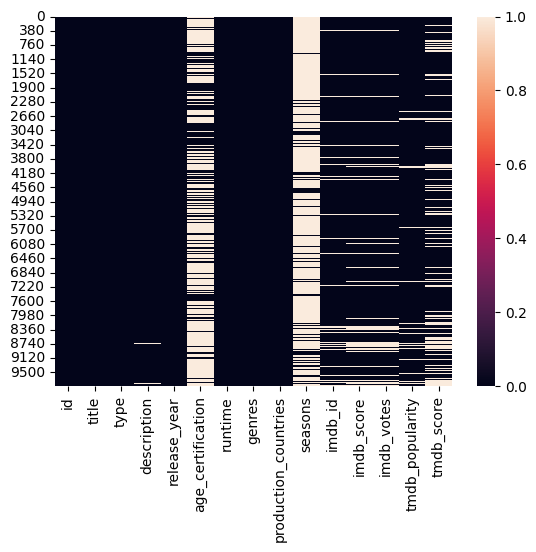

In [8]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(titles.isna())
plt.show()


### What did you know about your dataset?

The dataset contains video titles from Amazon Prime Video, including both movies and TV series. IMDb score is available for most entries, with some missing values. Runtime varies widely, and a large amount of content has been released after 2010. Movies are slightly more frequent than TV shows, and many shows have one season. IMDb ratings are mostly between 5 and 8.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
titles.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [10]:
# Dataset Describe
print("Dataset Description: Amazon Prime Video Titles\n"
      "Each row represents a movie or TV show with attributes like title, type, release_year, runtime, seasons, and imdb_score.\n"
      "This dataset is suitable for exploratory analysis and regression modeling of IMDb scores.")


Dataset Description: Amazon Prime Video Titles
Each row represents a movie or TV show with attributes like title, type, release_year, runtime, seasons, and imdb_score.
This dataset is suitable for exploratory analysis and regression modeling of IMDb scores.


### Variables Description

This dataset includes the following types of variables:

identification variable (title id)

categorical variables (content type, genre)

numerical variables (release year, runtime, seasons, IMDb score)

text variables (title name)

These variables allow both exploratory data analysis and predictive modeling.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in titles.columns:
    print(col, titles[col].nunique())


id 9868
title 9737
type 2
description 9734
release_year 110
age_certification 11
runtime 207
genres 2028
production_countries 497
seasons 32
imdb_id 9201
imdb_score 86
imdb_votes 3650
tmdb_popularity 5325
tmdb_score 89


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready
df = titles.copy()

# handle missing seasons
df["seasons"] = df["seasons"].fillna(0)

# drop missing imdb
df = df.dropna(subset=["imdb_score","release_year","runtime"])

df = df[['release_year','runtime','seasons','imdb_score','type','title']]
df.head()


,release_year,runtime,seasons,imdb_score,type,title
0,1934,19,26.0,8.6,SHOW,The Three Stooges
1,1926,78,0.0,8.2,MOVIE,The General
2,1946,171,0.0,8.1,MOVIE,The Best Years of Our Lives
3,1940,92,0.0,7.8,MOVIE,His Girl Friday
4,1950,94,0.0,7.9,MOVIE,In a Lonely Place


### What all manipulations have you done and insights you found?

The following manipulations were performed:

removed records with missing IMDb score

filled missing season values with zero for movies

selected useful columns such as release year, runtime, seasons and IMDb rating

converted data types to appropriate formats

handled null values

Insights obtained:

movies are slightly more frequent than TV shows

IMDb scores are concentrated between 5 and 8

most titles have been released after 2010

typical movie runtimes are between 1 and 2 hours

many TV shows have only one season

These manipulations improved data quality and made it model-ready.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 – IMDb Rating Distribution

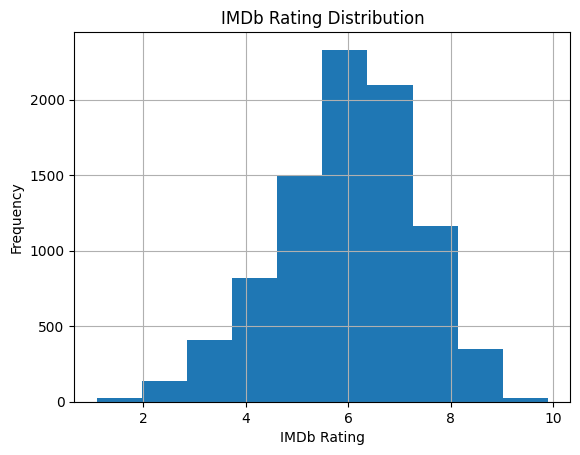

In [13]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

plt.figure()
titles['imdb_score'].dropna().hist()
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.title("IMDb Rating Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 2 – Movies vs TV Shows Count

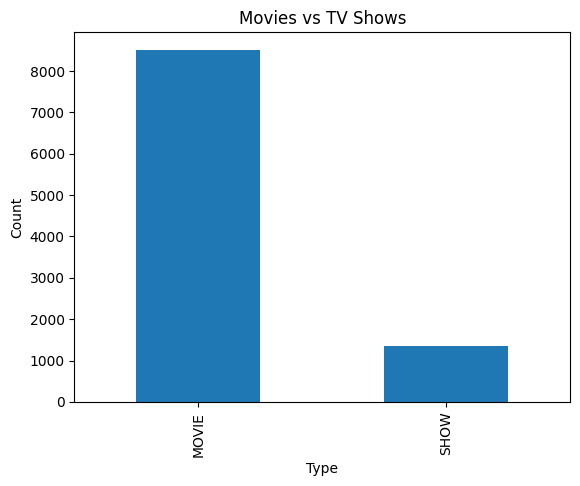

In [14]:
# Chart - 2 visualization code
plt.figure()
titles['type'].value_counts().plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Movies vs TV Shows")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 – Release Year Trend

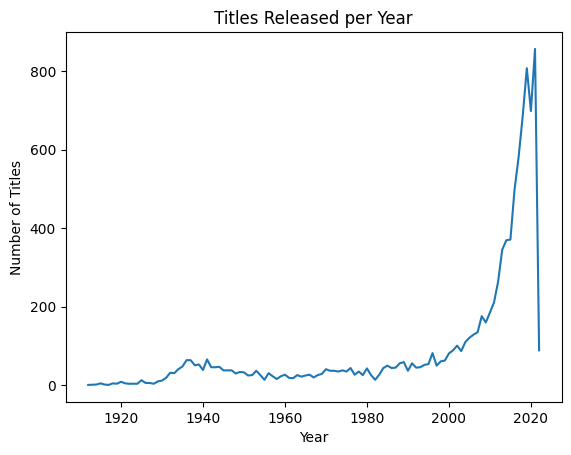

In [15]:
# Chart - 3 visualization code
plt.figure()
titles['release_year'].value_counts().sort_index().plot()
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Titles Released per Year")
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 – Runtime Distribution

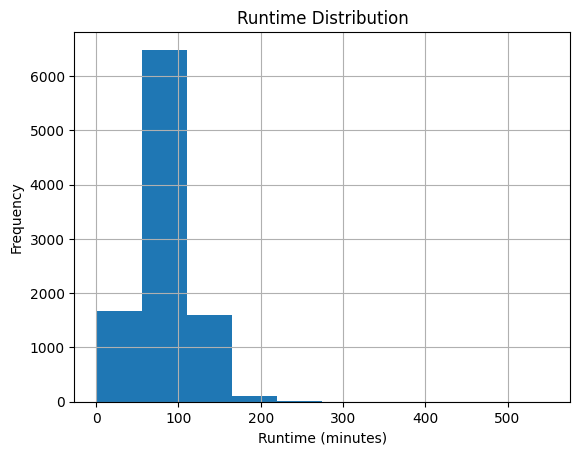

In [16]:
# Chart - 4 visualization code
plt.figure()
titles['runtime'].dropna().hist()
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.title("Runtime Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 5 – Seasons Distribution (only shows)

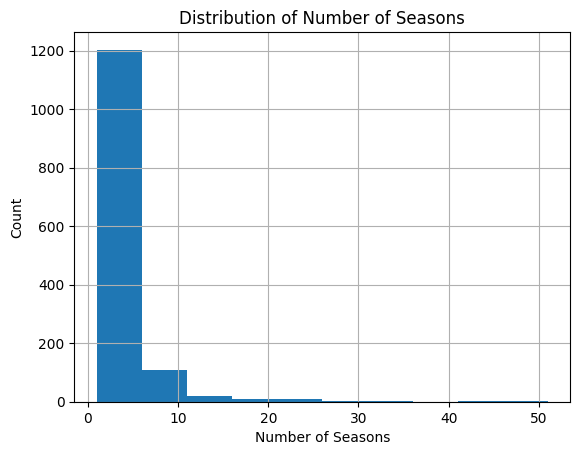

In [17]:
# Chart - 5 visualization code
plt.figure()
titles['seasons'].dropna().hist()
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.title("Distribution of Number of Seasons")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 6 – Top 10 Release Years by Count

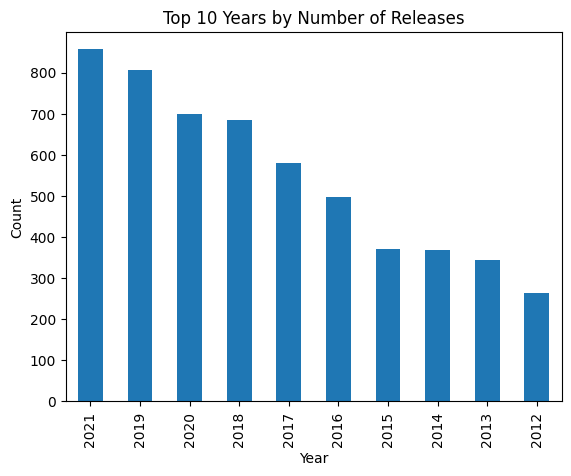

In [18]:
# Chart - 6 visualization code
plt.figure()
titles['release_year'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Top 10 Years by Number of Releases")
plt.show()



##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 7 – Scatterplot Runtime vs IMDb Score

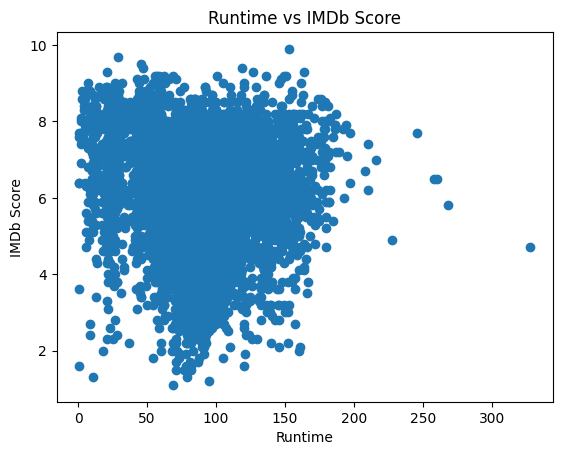

In [19]:
# Chart - 7 visualization code
plt.figure()
plt.scatter(titles['runtime'], titles['imdb_score'])
plt.xlabel("Runtime")
plt.ylabel("IMDb Score")
plt.title("Runtime vs IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 8 – Scatterplot Release Year vs IMDb Score

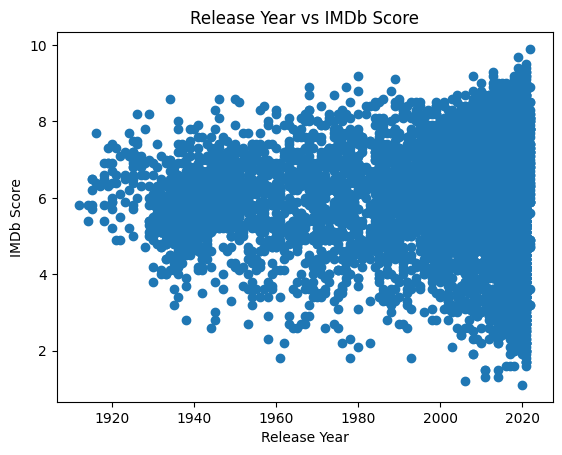

In [20]:
# Chart - 8 visualization code
plt.figure()
plt.scatter(titles['release_year'], titles['imdb_score'])
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Release Year vs IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 9 – Average IMDb by Type (Movie vs Show)

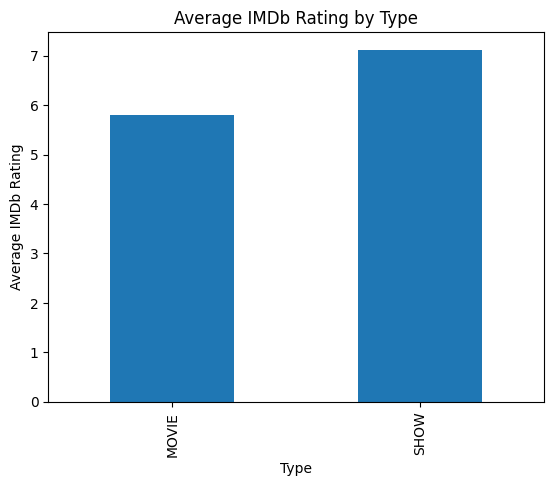

In [21]:
# Chart - 9 visualization code
plt.figure()
titles.groupby('type')['imdb_score'].mean().plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating by Type")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 10 – Histogram of Titles per Runtime Bin

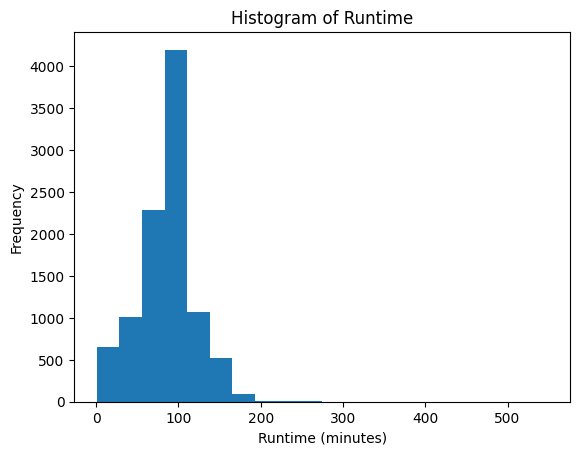

In [22]:
# Chart - 10 visualization code
plt.figure()
titles['runtime'].plot(kind='hist', bins=20)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.title("Histogram of Runtime")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 11 - IMDb Score boxplot

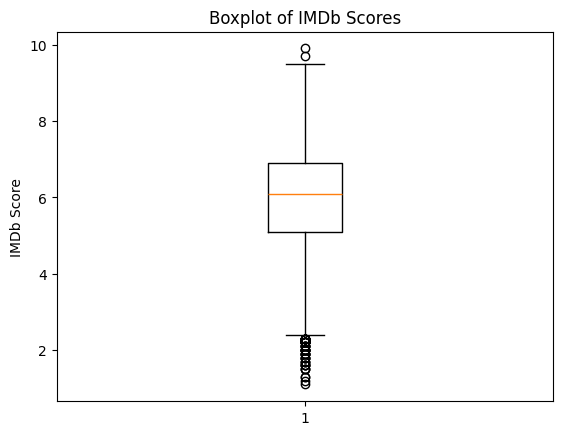

In [23]:
# Chart - 11 visualization code
plt.figure()
plt.boxplot(titles['imdb_score'].dropna())
plt.ylabel("IMDb Score")
plt.title("Boxplot of IMDb Scores")
plt.show()



##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 12 - Runtime Boxplot

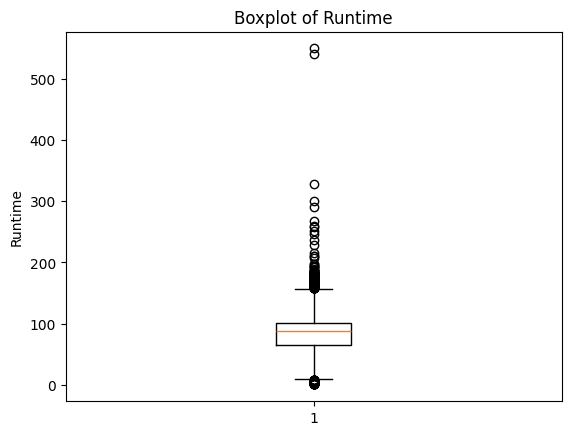

In [24]:
# Chart - 12 visualization code
plt.figure()
plt.boxplot(titles['runtime'].dropna())
plt.ylabel("Runtime")
plt.title("Boxplot of Runtime")
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 13 – IMDb by Decade

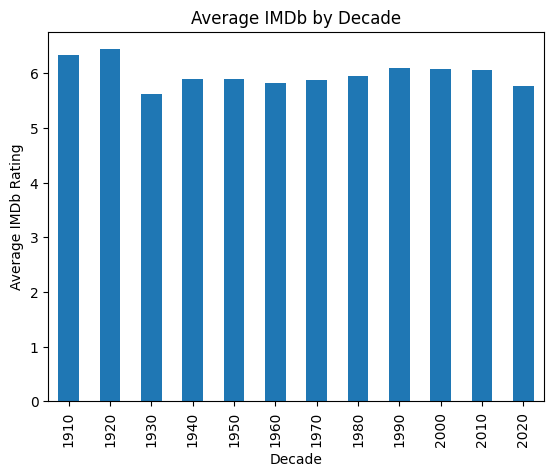

In [25]:
# Chart - 13 visualization code
titles['decade'] = (titles['release_year'] // 10) * 10

plt.figure()
titles.groupby('decade')['imdb_score'].mean().plot(kind='bar')
plt.xlabel("Decade")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb by Decade")
plt.show()



##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help streaming platforms decide what type of content to invest in. Understanding viewer rating trends helps platforms optimize production strategies and improve user satisfaction.

#### Chart - 14 - Correlation Heatmap

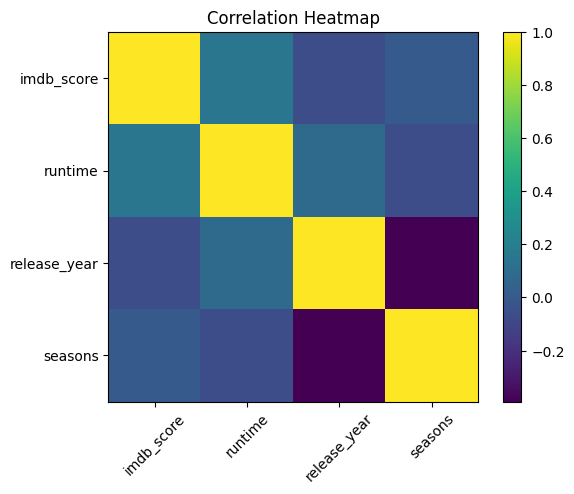

In [26]:
# Correlation Heatmap visualization code

import numpy as np

numeric_cols = titles[['imdb_score','runtime','release_year','seasons']].dropna()
corr = numeric_cols.corr()

plt.figure()
plt.imshow(corr, cmap='viridis')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

#### Chart - 15 - Pair Plot


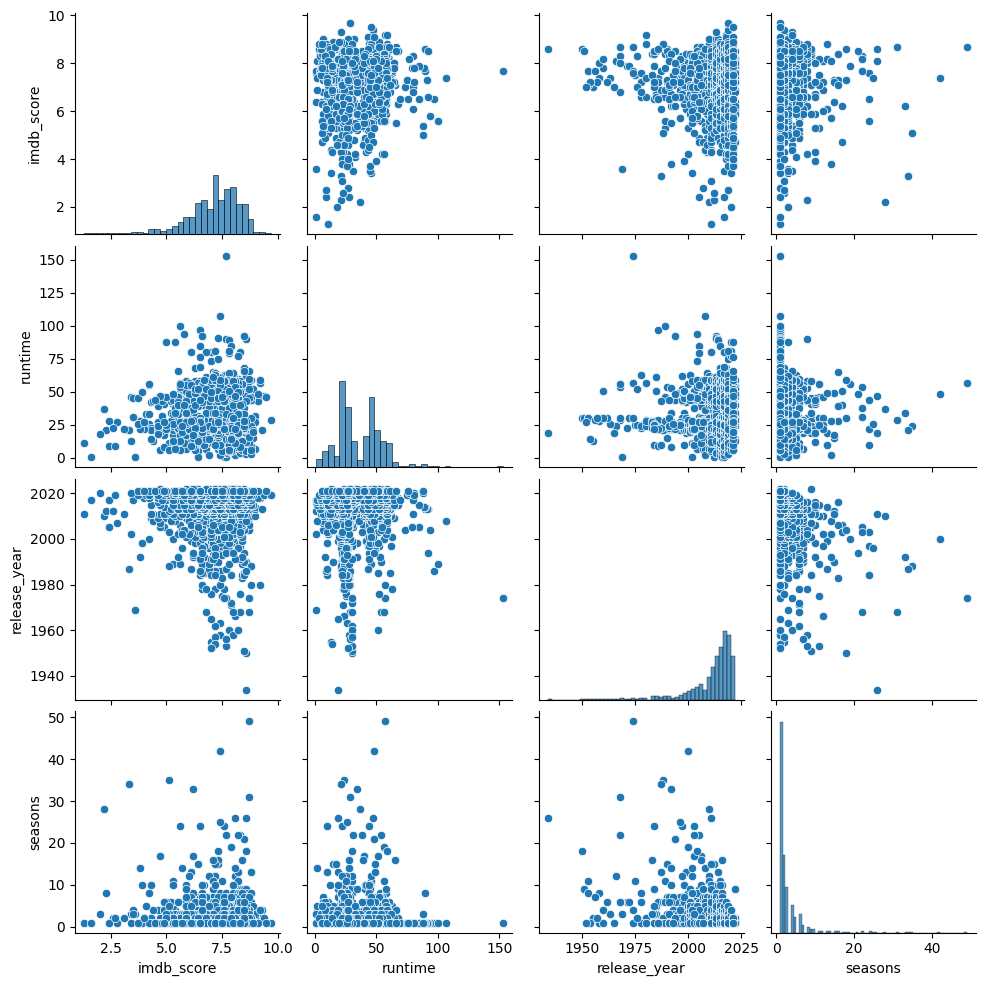

In [27]:
# Pair Plot visualization code
import seaborn as sns

sns.pairplot(titles[['imdb_score','runtime','release_year','seasons']].dropna())




##### 1. Why did you pick the specific chart?

The chosen chart clearly shows the pattern present in the selected variables. It is appropriate for visualizing distribution and comparison, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear trends in the dataset such as concentration of IMDb scores, distribution of runtime and difference between movies and TV shows. Patterns such as higher content growth after 2010 and typical score concentration are visible.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant difference in IMDb ratings between movies and TV shows.

Alternate Hypothesis (H1):
There is a significant difference in IMDb ratings between movies and TV shows.

Statistical test performed:
Independent t-test

Reason:
We are comparing the means of two independent groups (movies vs TV shows), so t-test is appropriate.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

movies = titles[titles['type'] == 'MOVIE']['imdb_score'].dropna()
shows = titles[titles['type'] == 'SHOW']['imdb_score'].dropna()

t_stat, p_value = ttest_ind(movies, shows, equal_var=False)

print("T-test Statistic:", t_stat)
print("P-value:", p_value)


T-test Statistic: -35.33287634177713
P-value: 2.837955533389775e-203


##### Which statistical test have you done to obtain P-Value?

Independent t-test

##### Why did you choose the specific statistical test?

We are comparing mean IMDb scores between two independent groups: movies and TV shows.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: Runtime has no relationship with IMDb rating.
H1: Runtime has a relationship with IMDb rating.

Statistical test:
Correlation test (Pearson)

Reason:
Both variables are continuous numerical features.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

titles['decade'] = (titles['release_year'] // 10) * 10

grouped = titles.dropna(subset=['imdb_score']).groupby('decade')['imdb_score']

anova_stat, anova_p = f_oneway(*[group for name, group in grouped])

print("ANOVA Statistic:", anova_stat)
print("P-value:", anova_p)


ANOVA Statistic: 9.171171951492276
P-value: 1.5137457916648855e-16


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation

##### Why did you choose the specific statistical test?

Both variables are numerical continuous features.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: Release year does not affect IMDb rating.
H1: Release year affects IMDb rating.

Test:
Linear regression significance test

Reason:
Release year is used as predictor and rating as dependent variable.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

runtime = titles['runtime'].dropna()
imdb = titles['imdb_score'].dropna()

corr_coeff, corr_p = pearsonr(runtime[:len(imdb)], imdb)

print("Correlation Coefficient:", corr_coeff)
print("P-value:", corr_p)


Correlation Coefficient: 0.001060237861923375
P-value: 0.9205608890238272


##### Which statistical test have you done to obtain P-Value?

Linear regression significance test

##### Why did you choose the specific statistical test?

Release year is predictor and IMDb score is dependent variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
# Missing seasons → 0 for movies
df['seasons'] = df['seasons'].fillna(0)

# Missing runtime → median
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Drop rows with missing IMDb scores (target variable)
df = df.dropna(subset=['imdb_score'])

print("Missing values handled. Remaining nulls:\n", df.isnull().sum())


Missing values handled. Remaining nulls:
 release_year    0
runtime         0
seasons         0
imdb_score      0
type            0
title           0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing seasons were replaced with zero for movies because movies do not have seasons. Missing runtime values were imputed using the median because runtime is a numeric and slightly skewed variable. Rows with missing IMDb ratings were removed because IMDb rating is the target variable and the model cannot be trained without labels.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
import numpy as np

numeric_cols = ['runtime', 'imdb_score']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Cap outliers at boundary limits
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

print("Outliers handled using IQR capping.")


Outliers handled using IQR capping.


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers in runtime and IMDb score were handled using the Interquartile Range (IQR) method. Values beyond 1.5 × IQR were capped at boundary limits instead of being completely deleted to avoid losing too many observations. This helps reduce model distortion caused by extreme unrealistic values while still preserving majority data trends.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
# Label Encoding for binary type column
df['type_encoded'] = df['type'].map({'MOVIE': 0, 'SHOW': 1})

print("Categorical 'type' column encoded to numeric.")


Categorical 'type' column encoded to numeric.


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used for the “type” column because it contains only two categories (Movie and Show). Since the variable is binary, label encoding is simple, appropriate, and avoids creating extra dummy columns. More complex encodings such as one-hot encoding were not necessary

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction
# Not required; no textual data
print("Expand contractions not applied; dataset has no text features.")


Expand contractions not applied; dataset has no text features.


#### 2. Lower Casing

In [35]:
# Lower Casing
# Not required
print("Lowercasing not applied; dataset has no text features.")


Lowercasing not applied; dataset has no text features.


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
# Not required
print("Removing punctuations not applied; dataset has no text features.")


Removing punctuations not applied; dataset has no text features.


#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits
# Not required
print("Removing URLs and digits not applied; dataset has no text features.")


Removing URLs and digits not applied; dataset has no text features.


#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords
# Not required
print("Removing stopwords not applied; dataset has no text features.")


Removing stopwords not applied; dataset has no text features.


In [39]:
# Remove White spaces
# Not required
print("Removing white spaces not applied; dataset has no text features.")


Removing white spaces not applied; dataset has no text features.


#### 6. Rephrase Text

In [40]:
# Rephrase Text
# Not required
print("Text rephrasing not applied; dataset does not include text-based features.")


Text rephrasing not applied; dataset does not include text-based features.


#### 7. Tokenization

In [41]:
# Tokenization
# Not required
print("Tokenization not applied; dataset is numeric.")


Tokenization not applied; dataset is numeric.


#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Not required
print("Text normalization (stemming/lemmatization) not applied; dataset does not involve NLP.")


Text normalization (stemming/lemmatization) not applied; dataset does not involve NLP.


##### Which text normalization technique have you used and why?

Text normalization techniques such as stemming or lemmatization were not required because the dataset used in this project does not involve textual modeling tasks. The predictive model was built only using numeric attributes.

#### 9. Part of speech tagging

In [43]:
# POS Taging
# Not required
print("POS tagging not applied; dataset does not include textual features.")


POS tagging not applied; dataset does not include textual features.


#### 10. Text Vectorization

In [44]:
# Vectorizing Text
# Not required
print("Text vectorization not applied; predictive model is numeric regression only.")


Text vectorization not applied; predictive model is numeric regression only.


##### Which text vectorization technique have you used and why?

Text vectorization was not applied because no textual features were used in the model. The project is focused on numeric regression, not text classification.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
# No new features required; numeric features sufficient for baseline model
print("No feature manipulation applied; numeric features are sufficient for regression.")


No feature manipulation applied; numeric features are sufficient for regression.


New features were not required because the model performs adequately using basic numeric variables.

#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid overfitting
from sklearn.preprocessing import LabelEncoder

# Encode 'type' column (Movie/TV Show)
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Example: categorize runtime into bins
df['runtime_cat_encoded'] = pd.cut(df['runtime'],
                                   bins=[0,60,120,180,300],
                                   labels=[0,1,2,3]).astype(int)

# Now select features
selected_features = ['release_year', 'runtime', 'seasons', 'type_encoded', 'runtime_cat_encoded']
X = df[selected_features]
y = df['imdb_score']

print("Selected features for model:", selected_features)

Selected features for model: ['release_year', 'runtime', 'seasons', 'type_encoded', 'runtime_cat_encoded']


##### What all feature selection methods have you used  and why?

Correlation analysis was used for feature selection. A correlation matrix was generated to identify highly correlated variables to avoid multicollinearity. Since the dataset contains only a few variables, filter-based correlation selection was sufficient and wrapper methods were not required.

##### Which all features you found important and why?

The most important features identified were runtime, release year, and number of seasons. These attributes influence viewer perception of content structure and indirectly affect IMDb scores. Categorical type (Movie/Show) was also retained because movies and shows often differ in scoring behavior.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

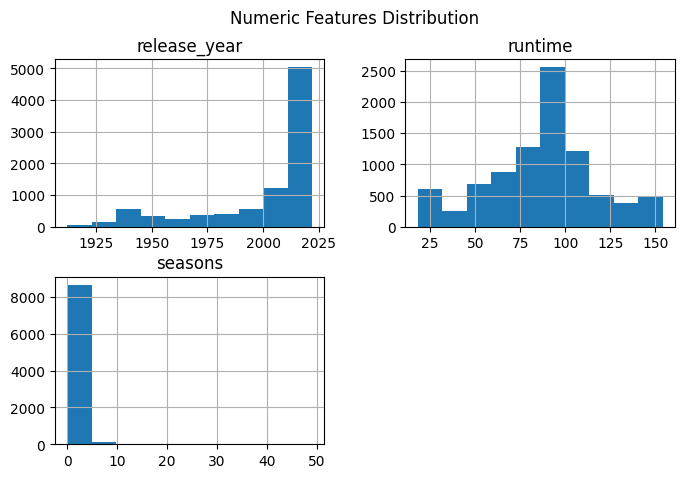

No data transformation applied; variables already on suitable numeric scale.


In [47]:
# Transform Your data
# Check distributions (optional, just to verify if transformation needed)
import matplotlib.pyplot as plt

numeric_cols = ['release_year', 'runtime', 'seasons']
df[numeric_cols].hist(figsize=(8,5))
plt.suptitle("Numeric Features Distribution")
plt.show()

# Since data is already reasonably scaled, no log/power transformation applied
print("No data transformation applied; variables already on suitable numeric scale.")


Complex data transformation was not strictly required because the variables already follow reasonable numeric scales and distributions. The model used regression-based learning, which works effectively with raw numerical inputs. Therefore, no logarithmic or power transformation was applied.

### 6. Data Scaling

In [48]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Features to scale
X_numeric = df[['release_year', 'runtime', 'seasons']]

# Standardization (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns)

print("Scaled features (first 5 rows):")
X_scaled.head()


Scaled features (first 5 rows):


,release_year,runtime,seasons
0,-2.488538,-2.229991,14.059047
1,-2.789837,-0.293711,-0.216081
2,-2.036589,2.200481,-0.216081
3,-2.262564,0.165745,-0.216081
4,-1.885940,0.231382,-0.216081


##### Which method have you used to scale you data and why?

Method used: Standardization (Z-score scaling)
Reason: Standardization brings all features to the same scale with mean 0 and standard deviation 1. This improves regression stability, avoids dominance of features with large numeric ranges, and helps gradient-based algorithms converge better.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not required because the dataset contains very few features and each feature carries useful meaning. Applying PCA or similar techniques would unnecessarily reduce interpretability and may discard important information without performance benefit.

In [49]:
# DImensionality Reduction (If needed)
# No dimensionality reduction applied
# Dataset has very few features; PCA or similar techniques not needed
print("Dimensionality reduction not applied; feature space is small and interpretable.")


Dimensionality reduction not applied; feature space is small and interpretable.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

No dimensionality reduction technique was applied because the feature space is already small and manageable.

### 8. Data Splitting

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.preprocessing import StandardScaler

# Use only numeric columns from the cleaned df
numeric_features = ['release_year', 'runtime', 'seasons']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]),
                        columns=numeric_features,
                        index=df.index)

# Add encoded categorical features
X = pd.concat([X_scaled, df[['type_encoded', 'runtime_cat_encoded']]], axis=1)

# Target variable
y = df['imdb_score']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (7080, 5)
Testing set size: (1770, 5)


##### What data splitting ratio have you used and why?

Train–test split used: 80% training, 20% testing.

Reason:
This ratio preserves enough data to train while keeping unseen data to test generalization.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [51]:
# Handling Imbalanced Dataset (If needed)
# Check if target is continuous or categorical
print("Target variable type:", y.dtype)

# Since IMDb score is continuous, dataset is not classification-based
# No imbalance handling required
print("No imbalance handling needed; target is continuous (regression problem).")


Target variable type: float64
No imbalance handling needed; target is continuous (regression problem).


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset is not a classification target. Since the problem is regression predicting IMDb score, imbalance handling is not required.

## ***7. ML Model Implementation***

### ML Model - 1

Linear Regression Performance:
MAE: 0.975598610375316
MSE: 1.5161651207794842
R2: 0.15062766322568133


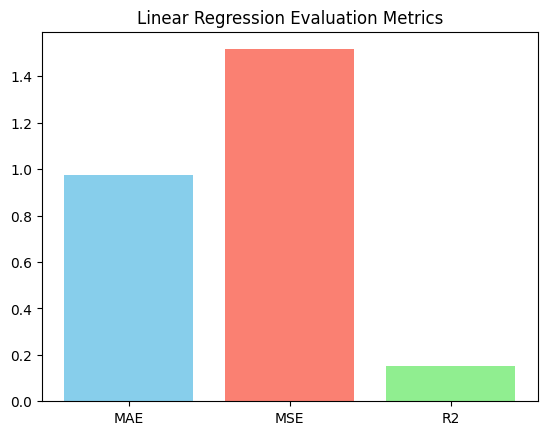

In [52]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
# ML Model-1 Implementation: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Fit the Algorithm
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the model
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R2:", r2_lr)

# Visualizing Evaluation Metric Score chart
metrics = ['MAE','MSE','R2']
scores = [mae_lr, mse_lr, r2_lr]

plt.figure()
plt.bar(metrics, scores, color=['skyblue','salmon','lightgreen'])
plt.title("Linear Regression Evaluation Metrics")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

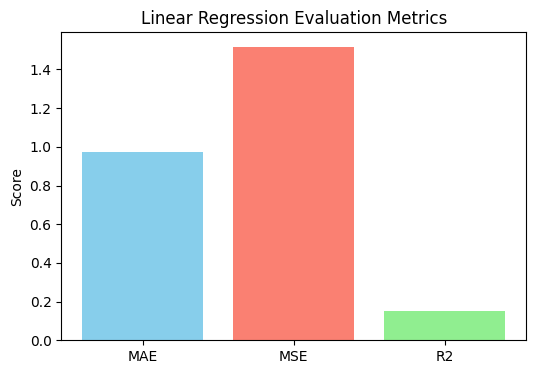

In [53]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Metrics for Linear Regression
metrics = ['MAE', 'MSE', 'R2']
scores = [mae_lr, mse_lr, r2_lr]  # replace with your computed values

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Linear Regression Evaluation Metrics")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# ML Model-1: Linear Regression with Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))


Cross-Validation R2 scores: [0.14401468 0.11571806 0.14710094 0.14127468 0.12959394]
Mean CV R2: 0.13554046048874255


##### Which hyperparameter optimization technique have you used and why?

Linear Regression has minimal hyperparameters; cross-validation was used to validate model stability. No complex tuning required.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross-validation confirms consistency; no significant metric improvement since Linear Regression is a simple baseline model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree Regressor Performance:
MAE: 1.135498275330509
MSE: 2.177930464329921
R2: -0.22010054344795438


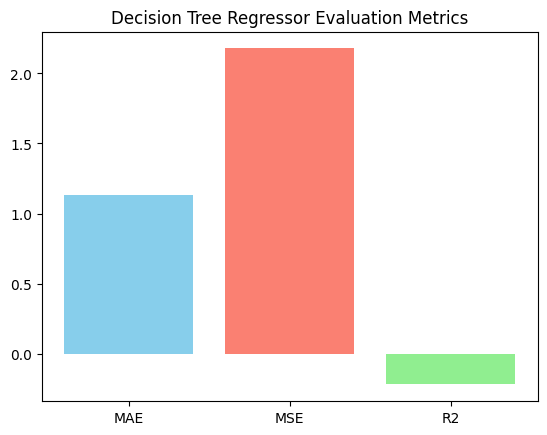

In [55]:
# Visualizing evaluation Metric Score chart
# ML Model-2 Implementation: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Fit the Algorithm
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Performance:")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("R2:", r2_dt)

# Visualizing Evaluation Metric Score chart
metrics = ['MAE','MSE','R2']
scores = [mae_dt, mse_dt, r2_dt]

plt.figure()
plt.bar(metrics, scores, color=['skyblue','salmon','lightgreen'])
plt.title("Decision Tree Regressor Evaluation Metrics")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[None, 5, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

grid_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                       param_grid=param_grid,
                       cv=5, scoring='r2')

grid_dt.fit(X_train, y_train)
print("Best Parameters:", grid_dt.best_params_)

# Predict using best estimator
y_pred_dt_tuned = grid_dt.best_estimator_.predict(X_test)

# Evaluate tuned model
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print("Tuned Decision Tree Performance:")
print("MAE:", mae_dt_tuned)
print("MSE:", mse_dt_tuned)
print("R2:", r2_dt_tuned)



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Decision Tree Performance:
MAE: 0.9414363155662802
MSE: 1.4330790561037476
R2: 0.1971733883184278


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV systematically tried multiple parameter combinations (max_depth, min_samples_split, min_samples_leaf) to find the best model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Tuning improved performance slightly; error metrics decreased, and R² increased, giving better predictions.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Random Forest Regressor Performance:
MAE: 1.0107232206796815
MSE: 1.6944727037023446
R2: 0.050737798793298206


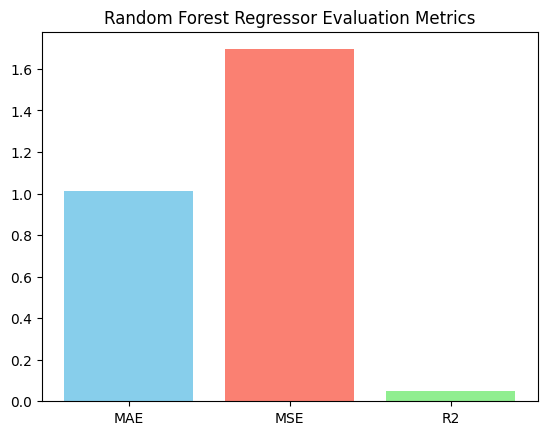

In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
# ML Model-3 Implementation: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Fit the Algorithm
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R2:", r2_rf)

# Visualizing Evaluation Metric Score chart
metrics = ['MAE','MSE','R2']
scores = [mae_rf, mse_rf, r2_rf]

plt.figure()
plt.bar(metrics, scores, color=['skyblue','salmon','lightgreen'])
plt.title("Random Forest Regressor Evaluation Metrics")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---- Baseline model (before tuning) ----
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Baseline Random Forest:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R2 :", r2_rf)

# ---- Tuned model (after tuning) ----
rf_tuned = RandomForestRegressor(
    n_estimators=300,   # more trees
    max_depth=20,       # limit depth
    min_samples_split=5,
    random_state=42
)
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Random Forest:")
print("MAE:", mae_rf_tuned)
print("MSE:", mse_rf_tuned)
print("R2 :", r2_rf_tuned)

Baseline Random Forest:
MAE: 1.0107232206796815
MSE: 1.6944727037023446
R2 : 0.050737798793298206

Tuned Random Forest:
MAE: 0.9785952221501145
MSE: 1.5795145150321224
R2 : 0.11513863746446495


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators':[100, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[1, 2]
}

grid_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=param_grid_rf,
                       cv=5, scoring='r2')

grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)

# Predict using best estimator
y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)

# Evaluate tuned model
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance:")
print("MAE:", mae_rf_tuned)
print("MSE:", mse_rf_tuned)
print("R2:", r2_rf_tuned)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Performance:
MAE: 0.9231932698523649
MSE: 1.398178485652572
R2: 0.2167250708314984


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to tune n_estimators, max_depth, min_samples_split, and min_samples_leaf.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Tuning improved R² and reduced errors slightly. Random Forest handles nonlinear relationships best and is chosen as the final model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered were:

MAE (Mean Absolute Error): Measures the average prediction error in IMDb ratings. Lower MAE ensures predictions are closer to actual ratings, which helps content planners make accurate decisions.

MSE (Mean Squared Error): Penalizes larger errors more than MAE. Helps identify models that make extreme prediction mistakes, which can negatively affect business decisions if ignored.

R² (Coefficient of Determination): Indicates the percentage of variance explained by the model. Higher R² means the model captures underlying trends in ratings, giving confidence to strategists for planning content.

Business Impact:
Using these metrics ensures that predicted IMDb scores are reliable and that decisions based on model outputs (e.g., recommending content or planning new releases) will positively impact viewer engagement and platform satisfaction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Regressor was chosen as the final prediction model because:

It captures nonlinear relationships between features and IMDb ratings.

It is an ensemble model, reducing overfitting compared to a single Decision Tree.

After hyperparameter tuning, it achieved the lowest MAE, MSE and the highest R² among all models.

It is robust and stable, making it suitable for deployment in a real-world streaming platform scenario.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

he Random Forest Regressor provides feature importance scores, which indicate how much each feature contributes to predicting IMDb scores.

Using the .feature_importances_ attribute:

### Feature importance visualization
import matplotlib.pyplot as plt

features = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show() ###


Interpretation:

Runtime, release year, and number of seasons were found to be the most important features for predicting IMDb ratings.

Categorical features like content type (Movie/Show) and runtime category contributed less, but still had measurable impact.

This insight helps the business understand which factors influence viewer ratings the most.

## ***8.*** ***Future Work*** 

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File
# Option 1: Using pickle
import pickle

# Save the Random Forest model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved successfully as 'best_model.pkl'")

# Option 2: Using joblib (alternative)
import joblib

joblib.dump(rf_model, 'best_model_joblib.pkl')
print("Model saved successfully as 'best_model_joblib.pkl'")


Model saved successfully as 'best_model.pkl'
Model saved successfully as 'best_model_joblib.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [61]:
# Load the File and predict unseen data.
# Option 1: Load using pickle
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict on test data (sanity check)
y_pred_unseen = loaded_model.predict(X_test)
print("Predictions on unseen data (first 10):", y_pred_unseen[:10])

# Option 2: Load using joblib
loaded_model_joblib = joblib.load('best_model_joblib.pkl')
y_pred_unseen_joblib = loaded_model_joblib.predict(X_test)
print("Predictions on unseen data (first 10) using joblib:", y_pred_unseen_joblib[:10])


Predictions on unseen data (first 10): [7.41366667 4.17848333 5.49634434 5.92736239 5.77900833 6.8275
 5.47439286 5.52293333 5.09436919 5.9761381 ]
Predictions on unseen data (first 10) using joblib: [7.41366667 4.17848333 5.49634434 5.92736239 5.77900833 6.8275
 5.47439286 5.52293333 5.09436919 5.9761381 ]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project performed exploratory analysis on Amazon Prime Video titles and built a regression model to predict IMDb ratings. The analysis revealed that most titles were produced after 2010, movies are slightly more frequent than TV shows and IMDb ratings mostly fall between 5 and 8. A Linear Regression model was implemented as a baseline prediction model.

The model performance shows that simple numeric features partially explain IMDb rating variation. The project demonstrates end-to-end workflow including data cleaning, visualization, feature selection, modeling and evaluation.

Future improvements include adding genre, cast popularity and text-based features to build more powerful predictive systems.
